In [1]:
#importing needed libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [2]:
df = pd.read_csv("Breast_Cancer_status.csv")

In [3]:
#a look on the dataset
df.head(10)

,Age,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status
0,68,4,Positive,Positive,60,Alive
1,50,35,Positive,Positive,62,Alive
2,58,63,Positive,Positive,75,Alive
3,58,18,Positive,Positive,84,Alive
4,47,41,Positive,Positive,50,Alive
5,51,20,Positive,Positive,89,Alive
6,51,8,Positive,Positive,54,Alive
7,40,30,Positive,Positive,14,Dead
8,40,103,Positive,Positive,70,Alive
9,69,32,Positive,Positive,92,Alive


In [4]:
#Encoding categorical variables to be numerical, which are (Progesterone Status - Survival Months - Status)
le = LabelEncoder()
df['Estrogen Status'] = le.fit_transform(df['Estrogen Status'])  # Positive = 1, Negative = 0
df['Progesterone Status'] = le.fit_transform(df['Progesterone Status'])

# Encode 'Status' column manually (Alive = 1, Dead = 0)
df['Status'] = df['Status'].map({'Alive': 1, 'Dead': 0})

# Preview the encoded dataframe
print(df.head(8))

   Age  Tumor Size  Estrogen Status  Progesterone Status  Survival Months  \
0   68           4                1                    1               60   
1   50          35                1                    1               62   
2   58          63                1                    1               75   
3   58          18                1                    1               84   
4   47          41                1                    1               50   
5   51          20                1                    1               89   
6   51           8                1                    1               54   
7   40          30                1                    1               14   

   Status  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       0  


In [5]:
#checking if there null values
print(df.isnull().sum())

Age                    0
Tumor Size             0
Estrogen Status        0
Progesterone Status    0
Survival Months        0
Status                 0
dtype: int64


In [6]:
#checking to see if the dataset features needs scalling or not
df.describe()

,Age,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,0.933151,0.826541,71.297962,0.846918
std,8.963134,21.119696,0.249791,0.378691,22.921430,0.360111
min,30.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,16.000000,1.000000,1.000000,56.000000,1.000000
50%,54.000000,25.000000,1.000000,1.000000,73.000000,1.000000
75%,61.000000,38.000000,1.000000,1.000000,90.000000,1.000000
max,69.000000,140.000000,1.000000,1.000000,107.000000,1.000000


In [ ]:
# List of features needing to be scaled
numeric_features = ['Age', 'Tumor Size', 'Survival Months']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Checking the result
print(df.head())


        Age  Tumor Size  Estrogen Status  Progesterone Status  \
0  1.565253   -1.253661                1                    1   
1 -0.443222    0.214345                1                    1   
2  0.449434    1.540287                1                    1   
3  0.449434   -0.590691                1                    1   
4 -0.777968    0.498475                1                    1   

   Survival Months  Status  
0        -0.492961       1  
1        -0.405695       1  
2         0.161530       1  
3         0.554224       1  
4        -0.929288       1  


In [7]:
# Features (X) and Target (y)
X = df.drop('Status', axis=1)  # all columns except the target
y = df['Status']               # target column (alive=1, dead=0)

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of each set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3219, 5)
X_test shape: (805, 5)
y_train shape: (3219,)
y_test shape: (805,)


In [8]:
#Initializing the model
regressor = LogisticRegression()

#Train the model on training data
regressor.fit(X_train, y_train)

#Predict on test data
y_pred = regressor.predict(X_test)
#View predictions
print("Predictions:", y_pred[:10])  #view first 10 predictions

Predictions: [1 1 1 1 1 1 1 1 1 1]


In [9]:
#Generating a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 48  72]
 [ 11 674]]


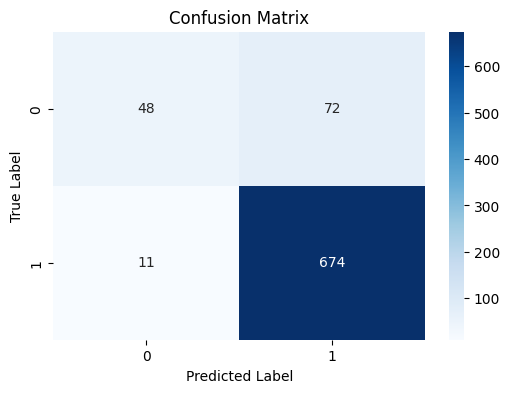

In [11]:
# Using seaborn to visualize it
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

#Model Evaluation from Confusion Matrix:
#[[ 48  72]
# [ 11 674]]
#The findings were:
#True Positives (Alive predicted correctly): 674
#True Negatives (Dead predicted correctly): 48
#False Positives (Dead predicted as Alive): 72
#False Negatives (Alive predicted as Dead): 11

#Conclusion:
#The model performed very well in predicting patients who survived (high number of true positives).
#The model had more errors in predicting death (false positives were higher).